# Notebook de simulation pour déterminer la fréquence nécessaire de mise à jour

Dans ce notebook, nous allons déterminer au bout de combien de temps le cluster devient instable et à quelle fréquence il doit être mis à jour.

# Import Bibliotèque

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
import yellowbrick
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score

pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

L'idée de cette partie est d'estimer le temps de stabilité d'un cluster et d'estimer au bout de combien de temps on doit mettre à jour le modèle de Clusters.

# Import des données.

In [2]:
Data = pd.read_excel("data_projet_4.xlsx",sheet_name = 'data_cluster')

On cherche à déterminer le nombre maximum de jours dans le data set.

In [3]:
Date = (Data['order_purchase_timestamp'].max() - Data['order_purchase_timestamp'].min())
print(Date)

695 days 05:15:47


On crée une variable qui donne le nombre maximum de jours.

In [4]:
Max_Day = 695

In [5]:
Data.head(5)

,Unnamed: 0,order_id,nb_days_before_delivered,Recency,Frequency,Payment by customer,review_score,order_purchase_timestamp
0,0,e481f51cbdc54678b7cc49136f2d6af7,8,332,2,82.82,4.0,2017-10-02 10:56:33
1,1,53cdb2fc8bc7dce0b6741e2150273451,12,36,1,141.46,4.0,2018-07-24 20:41:37
2,2,47770eb9100c2d0c44946d9cf07ec65d,9,22,1,179.12,5.0,2018-08-08 08:38:49
3,3,949d5b44dbf5de918fe9c16f97b45f8a,13,284,1,72.20,5.0,2017-11-18 19:28:06
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2,197,1,28.62,5.0,2018-02-13 21:18:39


On va prendre en compte 4 colonnes car on partira sur 4 clusters. On essaye de prendre autant de clusters que de features.

In [6]:
 Colonne = [
             "Recency",
             "Frequency",
             "Payment by customer",
             "review_score"
 
 ]

In [7]:
def data_filtered(df, date, col):
    
    """
    La fonction nous donne une data qui va filtrer les valeurs en fonction d'une date
    """
    
    Days = Max_Day - date
    # Filtrage du jeu d'entrée pour obtenir les données jusqu'à la date définie
    df = df.loc[df['Recency'] <= Days]
    
    return df[col]

# Initialisation

In [8]:
Data_T0 = data_filtered(Data, 1, Colonne)

In [9]:
Data_T0.head(2)

,Recency,Frequency,Payment by customer,review_score
0,332,2,82.82,4.0
1,36,1,141.46,4.0


In [10]:
def std_scaler (df, col) :
    
    """
    Fonction qui normalise les données et applique un PCA.
    """
    
    X = df[col].copy()
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    X_scaled = X.copy()
    Data_normalized = pd.DataFrame(X_scaled, columns=col )
    print("Mean:\n" ,Data_normalized.mean(axis=0).round(2))
    print("\n")
    print("Standard Deviation:\n ",Data_normalized.std(axis=0).round(2))
    
    pca = decomposition.PCA(n_components = len(col))
    PCA_RFM = pca.fit_transform(X_scaled)
    pcs = pca.components_
    print("==========================")
    print("Explaind Variance")
    print(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.sum())

    
    return Data_normalized, PCA_RFM

In [11]:
def Clustering_stab (df, col, model):
    
    """
    Standard Scalar
    """
    X = df[col].copy()
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    X_scaled = X.copy()
    Data_normalized = pd.DataFrame(X_scaled, columns=col )
    
    """
    Decomposition PCA
    """
    pca = decomposition.PCA(n_components = len(col))
    PCA_RFM = pca.fit_transform(X_scaled)
    pcs = pca.components_
    
    models = model 
    # Prediction
    models.fit(Data_normalized)
    label = models.fit_predict(Data_normalized)
    centroids = model.cluster_centers_
    u_labels = np.unique(label)
    
    return {"Modèle Fit":[models], "Df" : [df]}
    
    

On met en place ue échelle de tems.

In [12]:
times = np.linspace(1, 500, 150 )
times = times.astype(int)
times 

array([  1,   4,   7,  11,  14,  17,  21,  24,  27,  31,  34,  37,  41,
        44,  47,  51,  54,  57,  61,  64,  67,  71,  74,  78,  81,  84,
        88,  91,  94,  98, 101, 104, 108, 111, 114, 118, 121, 124, 128,
       131, 134, 138, 141, 145, 148, 151, 155, 158, 161, 165, 168, 171,
       175, 178, 181, 185, 188, 191, 195, 198, 201, 205, 208, 211, 215,
       218, 222, 225, 228, 232, 235, 238, 242, 245, 248, 252, 255, 258,
       262, 265, 268, 272, 275, 278, 282, 285, 289, 292, 295, 299, 302,
       305, 309, 312, 315, 319, 322, 325, 329, 332, 335, 339, 342, 345,
       349, 352, 355, 359, 362, 366, 369, 372, 376, 379, 382, 386, 389,
       392, 396, 399, 402, 406, 409, 412, 416, 419, 422, 426, 429, 433,
       436, 439, 443, 446, 449, 453, 456, 459, 463, 466, 469, 473, 476,
       479, 483, 486, 489, 493, 496, 500])

In [13]:
times

array([  1,   4,   7,  11,  14,  17,  21,  24,  27,  31,  34,  37,  41,
        44,  47,  51,  54,  57,  61,  64,  67,  71,  74,  78,  81,  84,
        88,  91,  94,  98, 101, 104, 108, 111, 114, 118, 121, 124, 128,
       131, 134, 138, 141, 145, 148, 151, 155, 158, 161, 165, 168, 171,
       175, 178, 181, 185, 188, 191, 195, 198, 201, 205, 208, 211, 215,
       218, 222, 225, 228, 232, 235, 238, 242, 245, 248, 252, 255, 258,
       262, 265, 268, 272, 275, 278, 282, 285, 289, 292, 295, 299, 302,
       305, 309, 312, 315, 319, 322, 325, 329, 332, 335, 339, 342, 345,
       349, 352, 355, 359, 362, 366, 369, 372, 376, 379, 382, 386, 389,
       392, 396, 399, 402, 406, 409, 412, 416, 419, 422, 426, 429, 433,
       436, 439, 443, 446, 449, 453, 456, 459, 463, 466, 469, 473, 476,
       479, 483, 486, 489, 493, 496, 500])

# Test de la stabilité des clusters

In [14]:
Data_col = Data[ Colonne]

In [15]:
Data

,Unnamed: 0,order_id,nb_days_before_delivered,Recency,Frequency,Payment by customer,review_score,order_purchase_timestamp
0,0,e481f51cbdc54678b7cc49136f2d6af7,8,332,2,82.82,4.0,2017-10-02 10:56:33
1,1,53cdb2fc8bc7dce0b6741e2150273451,12,36,1,141.46,4.0,2018-07-24 20:41:37
2,2,47770eb9100c2d0c44946d9cf07ec65d,9,22,1,179.12,5.0,2018-08-08 08:38:49
3,3,949d5b44dbf5de918fe9c16f97b45f8a,13,284,1,72.20,5.0,2017-11-18 19:28:06
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2,197,1,28.62,5.0,2018-02-13 21:18:39
...,...,...,...,...,...,...,...,...
94990,95746,9c5dedf39a927c1b2549525ed64a053c,8,539,1,85.08,5.0,2017-03-09 09:54:05
94991,95747,63943bddc261676b46f01ca7ac2f7bd8,22,205,1,195.00,4.0,2018-02-06 12:58:58
94992,95748,83c1379a015df1e13d02aae0204711ab,24,368,1,271.01,5.0,2017-08-27 14:46:43
94993,95749,11c177c8e97725db2631073c19f07b62,17,233,1,441.16,2.0,2018-01-08 21:28:27


On fit un modèle M0 sur tout le data set. Et on fit de nouveaux modèles M(t) à un instant t en retirant des éléments dans le data set de train en fonction de t. On prédit ensuite des labels sur les données initiales via les deux modèles M0 et MT puis on calcule le coefficient ARI pour déterminer la stabilité du modèle pour chaque t.

In [16]:
model_0 = KMeans(n_clusters=4)
scaler_t = StandardScaler()
X_0 = scaler_t.fit_transform(Data[Colonne])
model_0.fit(X_0)

Data_T0 = data_filtered(Data, 1, Colonne)
Data_T0  =  scaler_t.fit_transform(Data_T0)

ARI = []

Class_0_t = []
Class_1_t = []
Class_2_t = []
Class_3_t = []

Class_0_p = []
Class_1_p = []
Class_2_p = []
Class_3_p = []

for idx,t in enumerate (times) : 
    
    model_t = KMeans(n_clusters=4)
    Data_T = data_filtered(Data, t, Colonne)
    Data_T =  scaler_t.fit_transform(Data_T)
    model_t.fit(Data_T)
    print("NB data", Data_T.shape[0] )
    print("Time", t )
    
    # On stock les labels prédits par le modele M0 et le Modèle Mt dans des listes
    # On calcule le coefficient ARI pour déterminer la stabilité du clusters à travers le temps.
    
    labels_true  =  model_t.predict(Data_T0)
    labels_pred  = model_0.predict(Data_T0)
    
    label = {'true':labels_true , 'pred':labels_pred}
    label = pd.DataFrame(data = label, columns = ['true', 'pred'] )
    
    Class_0_t.append(len(label[label['true'] == 0 ]))
    Class_1_t.append(len(label[label['true'] == 1 ])) 
    Class_2_t.append(len(label[label['true'] == 2 ])) 
    Class_3_t.append(len(label[label['true'] == 3 ]))

    Class_0_p.append(len(label[label['pred'] == 0 ]))
    Class_1_p.append(len(label[label['pred'] == 1 ])) 
    Class_2_p.append(len(label[label['pred'] == 2 ])) 
    Class_3_p.append(len(label[label['pred'] == 3 ]))

        
    
    
    
    ARI.append(metrics.adjusted_rand_score(labels_true, labels_pred))
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94970
Time 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94844
Time 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94753
Time 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 17


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 21


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 24


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 27


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 31


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 34


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 37


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 41


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 44


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 47


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 51


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 54


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 57


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 61


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 67


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 74


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 78


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 81


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 84


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 88


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94741
Time 91


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94719
Time 94


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94701
Time 98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94680
Time 101


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94644
Time 104


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94553
Time 108


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94486
Time 111


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94370
Time 114


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94170
Time 118


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 94019
Time 121


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 93851
Time 124


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 93534
Time 128


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 93349
Time 131


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 93158
Time 134


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 92959
Time 138


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 92833
Time 141


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 92625
Time 145


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 92509
Time 148


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 92289
Time 151


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 91999
Time 155


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 91754
Time 158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 91552
Time 161


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 91188
Time 165


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 90989
Time 168


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 90708
Time 171


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 90410
Time 175


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 90161
Time 178


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 89977
Time 181


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 89659
Time 185


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 89441
Time 188


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 89221
Time 191


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 89020
Time 195


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 88836
Time 198


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 88601
Time 201


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 88198
Time 205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 87961
Time 208


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 87694
Time 211


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 87274
Time 215


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 86959
Time 218


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 86549
Time 222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 86206
Time 225


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 85820
Time 228


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 85357
Time 232


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 85011
Time 235


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 84742
Time 238


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 84268
Time 242


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 83984
Time 245


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 83611
Time 248


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 83193
Time 252


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 82844
Time 255


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 82605
Time 258


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 82262
Time 262


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 82011
Time 265


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 81690
Time 268


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 81323
Time 272


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 80984
Time 275


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 80632
Time 278


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 80149
Time 282


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 79762
Time 285


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 79204
Time 289


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 78859
Time 292


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 78494
Time 295


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 77999
Time 299


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 77620
Time 302


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 77187
Time 305


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 76710
Time 309


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 76269
Time 312


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 75959
Time 315


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 75321
Time 319


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 74964
Time 322


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 74597
Time 325


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 74167
Time 329


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 73699
Time 332


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 73334
Time 335


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 72808
Time 339


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 72497
Time 342


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 71960
Time 345


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 71389
Time 349


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 70923
Time 352


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 70541
Time 355


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 70016
Time 359


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 69651
Time 362


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 69062
Time 366


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 68685
Time 369


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 68252
Time 372


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 67670
Time 376


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 67227
Time 379


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 66703
Time 382


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 66186
Time 386


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 65752
Time 389


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 65432
Time 392


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 64906
Time 396


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 64525
Time 399


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 64026
Time 402


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 63365
Time 406


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 62819
Time 409


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 62325
Time 412


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 61526
Time 416


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 59640
Time 419


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 58501
Time 422


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 57551
Time 426


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 56672
Time 429


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 55894
Time 433


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 55174
Time 436


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 54638
Time 439


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 53986
Time 443


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 53627
Time 446


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 53347
Time 449


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 52778
Time 453


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 52515
Time 456


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 51854
Time 459


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 50978
Time 463


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 50207
Time 466


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 49505
Time 469


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 48440
Time 473


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 47857
Time 476


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 47107
Time 479


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 46372
Time 483


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 45641
Time 486


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 45073
Time 489


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 44086
Time 493


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 43513
Time 496


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NB data 42597
Time 500


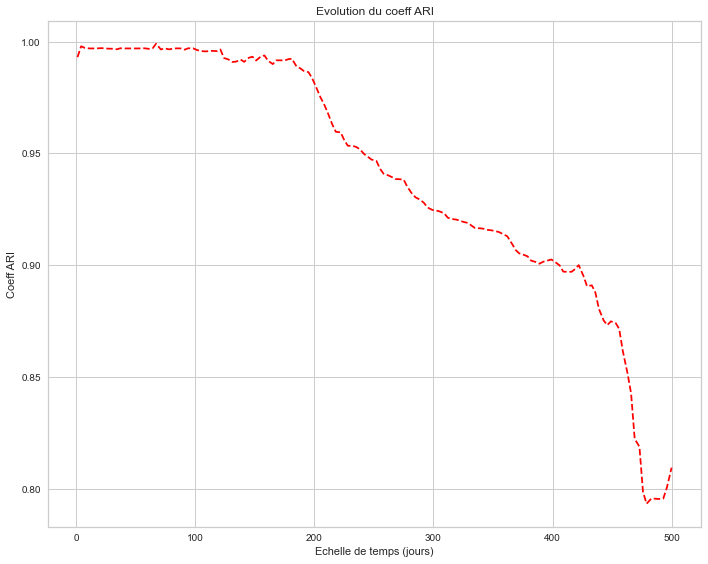

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(times, ARI,color = 'red',linestyle='dashed')
plt.xlabel('Echelle de temps (jours)')
plt.ylabel('Coeff ARI')
plt.title("Evolution du coeff ARI")
plt.tight_layout()
plt.show()

A partir de 399 jours, le modèle de clustering devient obsolète. Il faudra faire une mise à jour tout les 340 jours.

In [18]:
d = {'Times': times, 'Coeff ARI': ARI}
df = pd.DataFrame(data=d)
df.head

<bound method NDFrame.head of      Times  Coeff ARI
0        1   0.993067
1        4   0.997946
2        7   0.997234
3       11   0.996974
4       14   0.996974
..     ...        ...
145    486   0.795475
146    489   0.795329
147    493   0.795478
148    496   0.800340
149    500   0.809357

[150 rows x 2 columns]>

In [19]:
df_ = df.loc[df["Coeff ARI"] > 0.90]
df_

,Times,Coeff ARI
0,1,0.993067
1,4,0.997946
2,7,0.997234
3,11,0.996974
4,14,0.996974
...,...,...
117,392,0.901479
118,396,0.902044
119,399,0.902514
120,402,0.901446


# Divergence des clusters

On souhaite estimer la divergence des clusters. Identifier quels clusters sont impactés par la non mise à jour du modèle.

In [20]:
data_clust = { "times" : times ,
              "Class 0 True": Class_0_t, 
              "Class 1 True": Class_1_t, 
              "Class 2 True": Class_2_t, 
              "Class 3 True": Class_3_t, 
              "Class 0 Pred" : Class_0_p, 
              "Class 1 Pred": Class_1_p, 
              "Class 2 Pred": Class_2_p, 
              "Class 3 Pred": Class_3_p}

data_clust = pd.DataFrame(data_clust)
##data_clust = data_clust.set_index("times")

In [22]:

data_clust

,times,Class 0 True,Class 1 True,Class 2 True,Class 3 True,Class 0 Pred,Class 1 Pred,Class 2 Pred,Class 3 Pred
0,1,31948,41683,15588,5751,41701,31836,5831,15602
1,4,41655,31893,15591,5831,41701,31836,5831,15602
2,7,15588,31908,41643,5831,41701,31836,5831,15602
3,11,41635,15588,31916,5831,41701,31836,5831,15602
4,14,5831,41635,15588,31916,41701,31836,5831,15602
...,...,...,...,...,...,...,...,...,...
145,486,37671,14749,36539,6011,41701,31836,5831,15602
146,489,37717,36398,14819,6036,41701,31836,5831,15602
147,493,37785,14862,36297,6026,41701,31836,5831,15602
148,496,14764,36210,37962,6034,41701,31836,5831,15602


In [26]:
def class_transformer (df) :
    
    """
    Fonction qui réarrange les clusters.
    """
    
    class_0 = []
    class_1 = []
    class_2 = []
    class_3 = []

    classe_0_ori = list(df ["Class 0 True"])
    classe_1_ori = list(df ["Class 1 True"])
    classe_2_ori = list(df ["Class 2 True"])
    classe_3_ori = list(df ["Class 3 True"])
    
    for idx in range(len(df)) :
        
        var0 = 0
        var1 = 0
        var2 = 0
        var3 = 0
        
        c0 = classe_0_ori[idx]
        c1 = classe_1_ori[idx]
        c2 = classe_2_ori[idx]
        c3 = classe_3_ori[idx]
        
        list_class = [c0, c1, c2, c3]
        
        var0 = max(list_class)
        var2 = min(list_class)
        print("var1",var1)
        print("var2", var2)
        
        for var in [var0,var2] :
            list_class.remove(var)
        print(list_class)
            
        
            
        var1 = max(list_class)
        var3 = min(list_class)
        print("var3",var3)
        print("var0", var0)
        
        class_0.append(var0)
        class_1.append(var1)
        class_2.append(var2)
        class_3.append(var3)
        
    return  class_0, class_1, class_2, class_3
        
        

In [27]:
data_clust

,times,Class 0 True,Class 1 True,Class 2 True,Class 3 True,Class 0 Pred,Class 1 Pred,Class 2 Pred,Class 3 Pred
0,1,31948,41683,15588,5751,41701,31836,5831,15602
1,4,41655,31893,15591,5831,41701,31836,5831,15602
2,7,15588,31908,41643,5831,41701,31836,5831,15602
3,11,41635,15588,31916,5831,41701,31836,5831,15602
4,14,5831,41635,15588,31916,41701,31836,5831,15602
...,...,...,...,...,...,...,...,...,...
145,486,37671,14749,36539,6011,41701,31836,5831,15602
146,489,37717,36398,14819,6036,41701,31836,5831,15602
147,493,37785,14862,36297,6026,41701,31836,5831,15602
148,496,14764,36210,37962,6034,41701,31836,5831,15602


In [28]:
data_clust["Class 0 True"],data_clust["Class 1 True"],data_clust["Class 2 True"],data_clust["Class 3 True"] = class_transformer(data_clust)

var1 0
var2 5751
[31948, 15588]
var3 15588
var0 41683
var1 0
var2 5831
[31893, 15591]
var3 15591
var0 41655
var1 0
var2 5831
[15588, 31908]
var3 15588
var0 41643
var1 0
var2 5831
[15588, 31916]
var3 15588
var0 41635
var1 0
var2 5831
[15588, 31916]
var3 15588
var0 41635
var1 0
var2 5831
[15588, 31916]
var3 15588
var0 41635
var1 0
var2 5831
[31909, 15587]
var3 15587
var0 41643
var1 0
var2 5831
[15588, 31915]
var3 15588
var0 41636
var1 0
var2 5831
[31919, 15588]
var3 15588
var0 41632
var1 0
var2 5831
[31920, 15588]
var3 15588
var0 41631
var1 0
var2 5831
[15587, 31926]
var3 15587
var0 41626
var1 0
var2 5831
[15588, 31914]
var3 15588
var0 41637
var1 0
var2 5831
[31916, 15588]
var3 15588
var0 41635
var1 0
var2 5831
[15588, 31914]
var3 15588
var0 41637
var1 0
var2 5831
[31916, 15588]
var3 15588
var0 41635
var1 0
var2 5831
[31916, 15588]
var3 15588
var0 41635
var1 0
var2 5831
[31916, 15588]
var3 15588
var0 41635
var1 0
var2 5831
[31910, 15587]
var3 15587
var0 41642
var1 0
var2 5831
[31921, 155

In [29]:
data_clust

,times,Class 0 True,Class 1 True,Class 2 True,Class 3 True,Class 0 Pred,Class 1 Pred,Class 2 Pred,Class 3 Pred
0,1,41683,31948,5751,15588,41701,31836,5831,15602
1,4,41655,31893,5831,15591,41701,31836,5831,15602
2,7,41643,31908,5831,15588,41701,31836,5831,15602
3,11,41635,31916,5831,15588,41701,31836,5831,15602
4,14,41635,31916,5831,15588,41701,31836,5831,15602
...,...,...,...,...,...,...,...,...,...
145,486,37671,36539,6011,14749,41701,31836,5831,15602
146,489,37717,36398,6036,14819,41701,31836,5831,15602
147,493,37785,36297,6026,14862,41701,31836,5831,15602
148,496,37962,36210,6034,14764,41701,31836,5831,15602


On calcule le pourentage d'erreurs de la prédiction entre le modèle M0 et Mt.

In [30]:
data_clust["% Class 0"] = (data_clust["Class 0 True"]/ data_clust["Class 0 Pred"])*100
data_clust["% Class 1"] = (data_clust["Class 1 True"]/ data_clust["Class 1 Pred"])*100
data_clust["% Class 2"] = (data_clust["Class 2 True"]/ data_clust["Class 2 Pred"])*100
data_clust["% Class 3"] = (data_clust["Class 3 True"]/ data_clust["Class 3 Pred"])*100

In [31]:
data_clust.plot

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Divergence des clusters'}, xlabel='Temps en jours', ylabel='Nbr Population'>

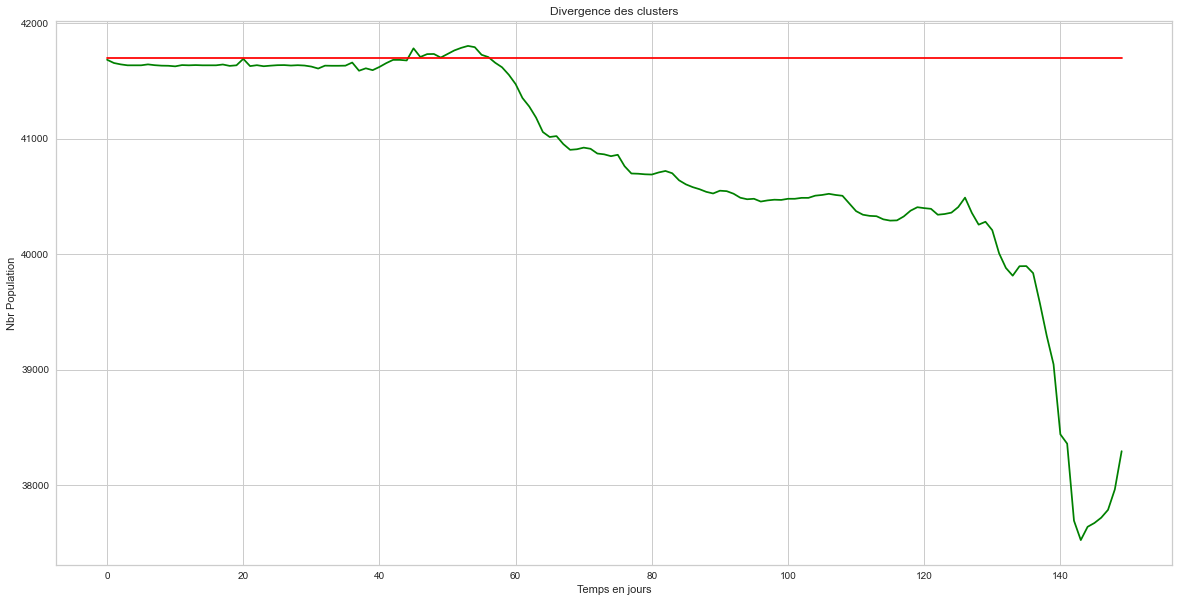

In [32]:
plt.legend()
plt.title("Divergence des clusters")
plt.ylabel("Nbr Population")
plt.xlabel("Temps en jours")

data_clust["Class 0 True"].plot(figsize = (20,10),color = 'green')
data_clust["Class 0 Pred"].plot(figsize = (20,10),color = 'red')

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Divergence des clusters'}, xlabel='Temps en jours', ylabel='Nbr Population'>

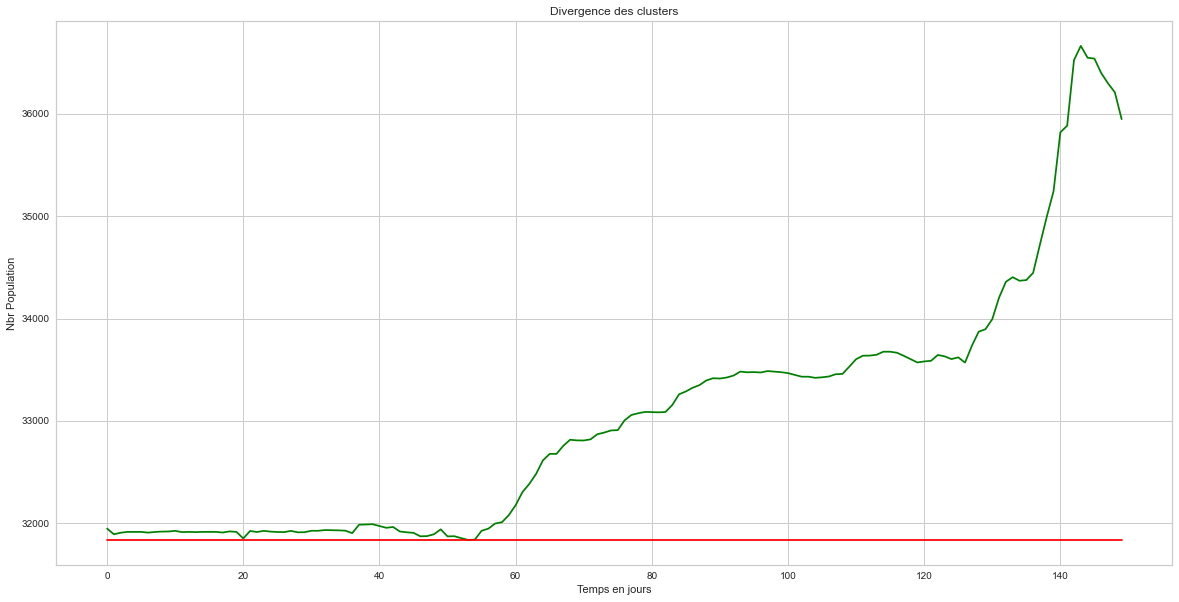

In [33]:
plt.legend()
plt.title("Divergence des clusters")
plt.ylabel("Nbr Population")
plt.xlabel("Temps en jours")

data_clust["Class 1 True"].plot(figsize = (20,10),color = 'green')
data_clust["Class 1 Pred"].plot(figsize = (20,10),color = 'red')

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Divergence des clusters'}, xlabel='Temps en jours', ylabel='Nbr Population'>

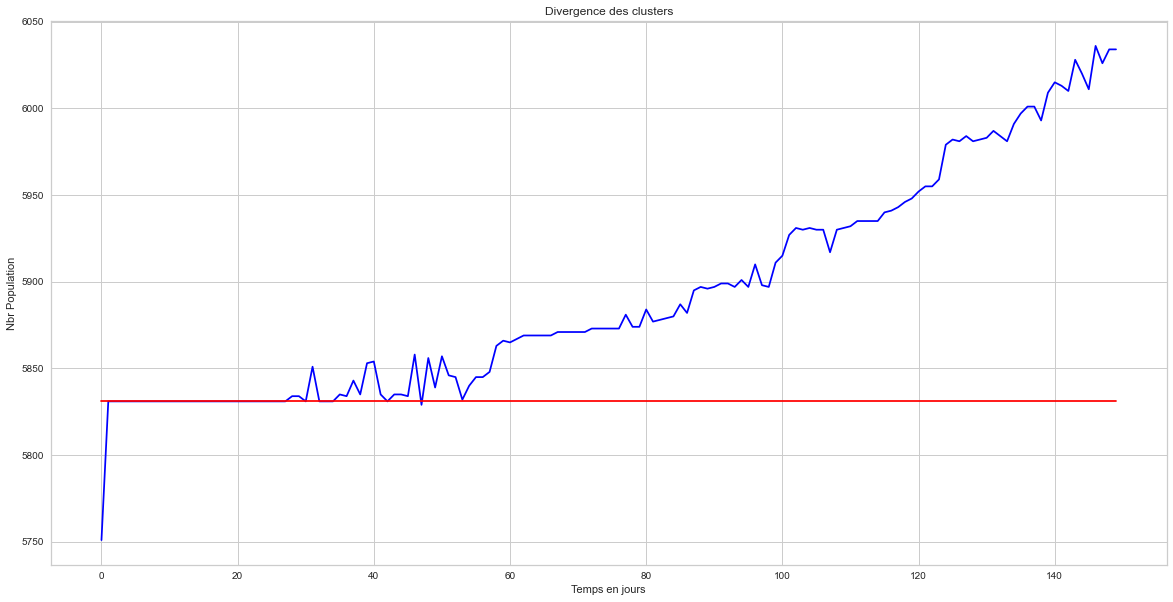

In [34]:
plt.legend()
plt.title("Divergence des clusters")
plt.ylabel("Nbr Population")
plt.xlabel("Temps en jours")

data_clust["Class 2 True"].plot(figsize = (20,10),color = 'blue')
data_clust["Class 2 Pred"].plot(figsize = (20,10),color = 'red')

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Divergence des clusters'}, xlabel='Temps en jours', ylabel='Nbr Population'>

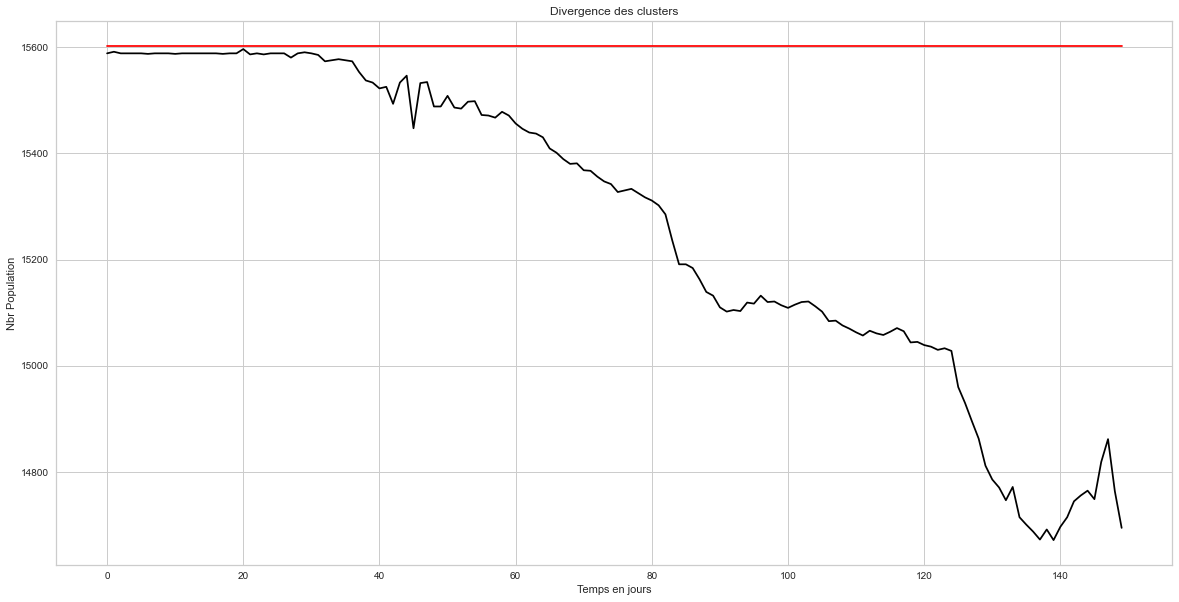

In [35]:
plt.legend()
plt.title("Divergence des clusters")
plt.ylabel("Nbr Population")
plt.xlabel("Temps en jours")

data_clust["Class 3 True"].plot(figsize = (20,10),color = 'black')
data_clust["Class 3 Pred"].plot(figsize = (20,10),color = 'red')

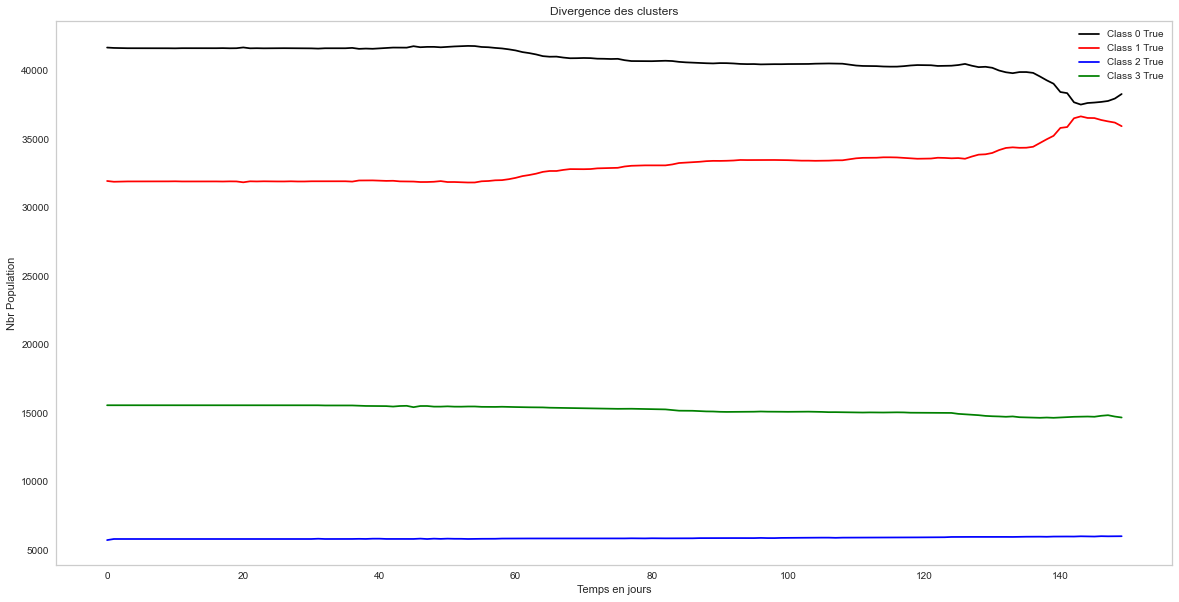

In [36]:

plt.title("Divergence des clusters")
plt.ylabel("Nbr Population")
plt.xlabel("Temps en jours")

data_clust["Class 0 True"].plot(figsize = (20,10),color = 'black')
data_clust["Class 1 True"].plot(figsize = (20,10),color = 'red')
data_clust["Class 2 True"].plot(figsize = (20,10),color = 'blue')
data_clust["Class 3 True"].plot(figsize = (20,10),color = 'green')
plt.grid(False)
plt.legend()


Les deux gros clusters sont le plus impactés par l'instabilité du modèle.

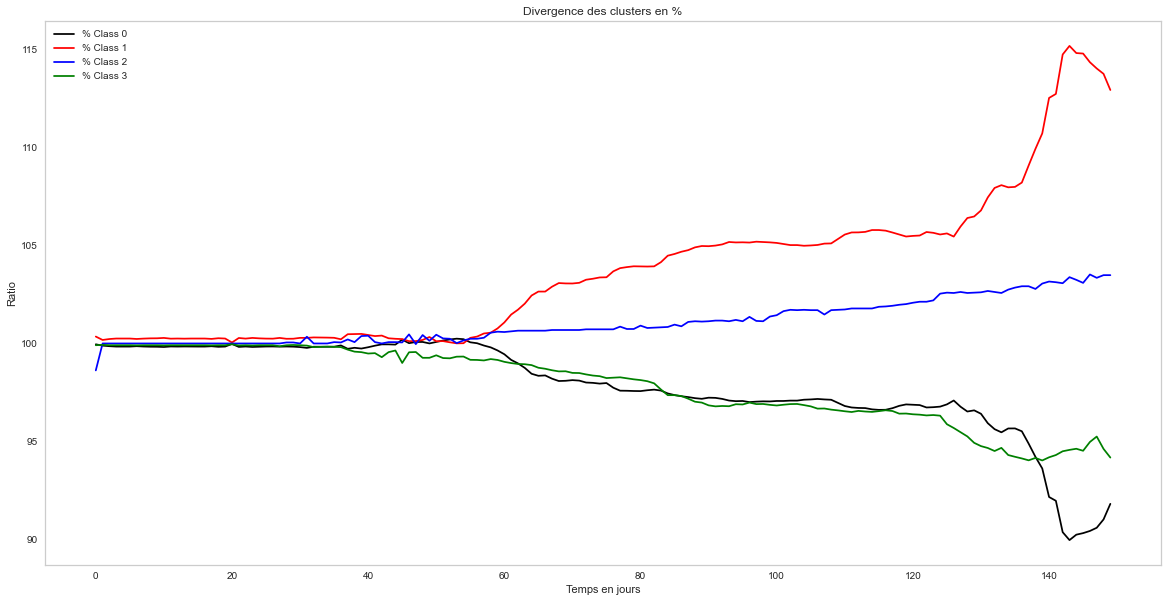

In [37]:
plt.title("Divergence des clusters en %")
plt.ylabel("Ratio")
plt.xlabel("Temps en jours")

data_clust["% Class 0"].plot(figsize = (20,10),color = 'black')
data_clust["% Class 1"].plot(figsize = (20,10),color = 'red')
data_clust["% Class 2"].plot(figsize = (20,10),color = 'blue')
data_clust["% Class 3"].plot(figsize = (20,10),color = 'green')
plt.grid(False)
plt.legend()


En pourcentage c'est le clusters 3 ET 0 sont très impacté et voient leurs population diminuer au fil du temps que le modèle devient instable. Le cluster 1 lui voit se population augmenter. Le Cluster 2 reste stable.